# 2D Virtual homo-decoupling in a 2D methyl H-C—HMQC with J-coupling around 35 Hz

In [5]:
import time
import numpy as np
import nmrglue as ng
import MRAi_2D as ma
import Proc_2D as pr
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':25})

### Define the path (direction) of the spectrum process in pipe format.
For example, the path to the high resolution methyl 2D H-C—HMQC spectrum of protein MALT1.
Replace this path with your actual spectrum file.

In [6]:
%%time
spectrum_direction = "Spectra/Malt_CC.ft2"
Dic , Ref = ng.pipe.read(spectrum_direction)

CPU times: user 543 μs, sys: 207 μs, total: 750 μs
Wall time: 1.51 ms


### Call the function with the default direction that runs the trained network for virtual decoupling.

In [7]:
%%time
DNN_dirc = "Trained_NN/VD_ID/"
dic , ref = pr.pipe_generator.iFT_ID(Dic,Ref)
VE = ma.convertors.US_VE(ref,256)
pred = ma.Production.VD_ID(VE, DNN_dirc)
ft1 = np.zeros_like(ref)
ft1[:min(int(pred.shape[0]),int(ft1.shape[0]))] = pred[:min(int(pred.shape[0]),int(ft1.shape[0]))]
_, VD = pr.pipe_generator.FT_ID(dic,ft1)


4/4 [==============================] - 0s 2ms/step
CPU times: user 1.08 s, sys: 55.2 ms, total: 1.13 s
Wall time: 1.09 s


### Plotting the spectra.

CPU times: user 74.5 ms, sys: 0 ns, total: 74.5 ms
Wall time: 73.5 ms


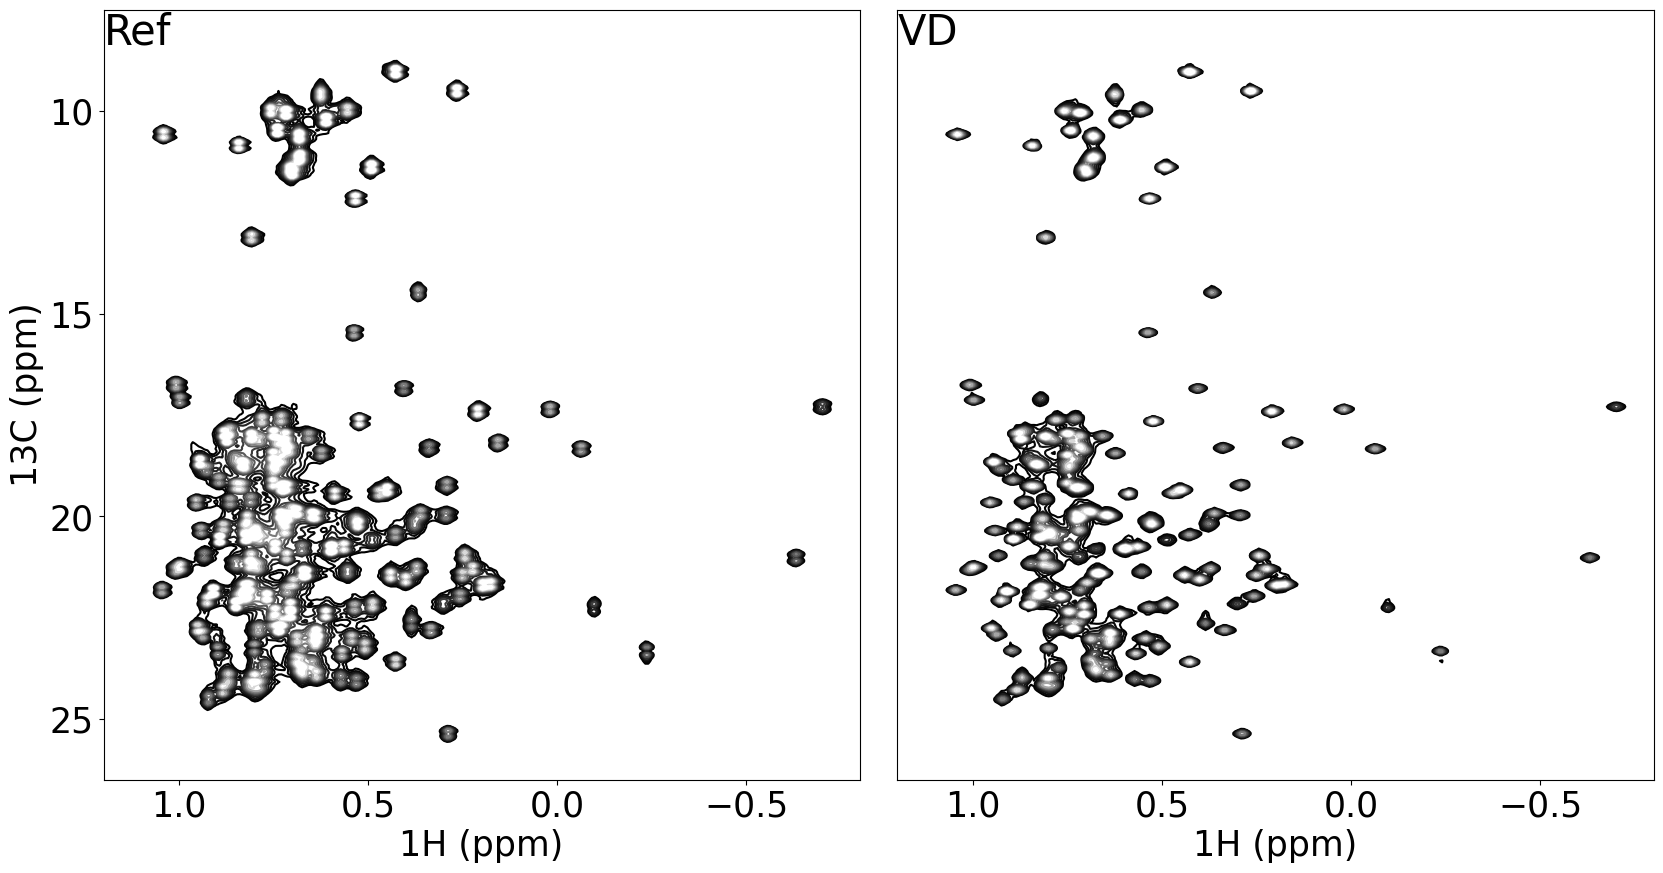

In [8]:
%%time

fig, ax = plt.subplots(1,2,figsize=(2*10,10))
cmap = [plt.cm.Greys_r,plt.cm.Reds_r]       #[+,-] contour map (colors to use for contours)
contour = [0.03,1.3,10]                     #[contour level start value, scaling factor between contour level]
lim = [1.2, -0.8,26.5, 7.5]                 #[xlim from,xlim to,ylim from,ylim to]

pr.PLOTS.subp(ax[0],Dic,Ref/np.max(Ref), "Ref",contour,cmap,lim)
pr.PLOTS.subp(ax[1],Dic,VD/np.max(VD), "VD",contour,cmap,lim)

ax[1].axes.yaxis.set_visible(False)

plt.subplots_adjust(wspace=0.05, hspace=0.05)